In [8]:
import os
os.chdir('D:\Disc Baru\Machine Learning\Oil and Gas\Log\Data untuk Peserta-20210306T004852Z-001\Data untuk Peserta')

In [9]:
import lasio
las = lasio.read('well-1.las')
well = las.df()
print(well)
#notice depth dianggap sebagai index instead of column

         CALI       DT      GR    ILD   MSFL  NPHI_LS   RHOB
DEPTH                                                       
3001.0  9.984  148.500  80.875  0.722  0.991  0.43701  2.170
3001.5  9.938  148.625  80.875  0.718  1.026  0.47705  2.176
3002.0  9.914  146.125  80.625  0.714  0.990  0.45947  2.166
3002.5  9.859  145.375  82.625  0.715  0.953  0.47754  2.158
3003.0  9.914  145.125  81.938  0.709  0.900  0.45508  2.156
...       ...      ...     ...    ...    ...      ...    ...
4458.0  8.484  109.000  79.812  1.122  1.744  0.33252  2.316
4458.5  8.469  109.438  82.312  1.112  1.972  0.34082  2.326
4459.0  8.484  109.562  77.188  1.092  1.959  0.35693  2.316
4459.5  8.461  110.750  75.250  1.079  1.746  0.37256  2.311
4460.0  8.469  110.938  75.188  1.067  1.625  0.36768  2.307

[2919 rows x 7 columns]


In [10]:
well.describe()

,CALI,DT,GR,ILD,MSFL,NPHI_LS,RHOB
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,8.893338,118.309119,74.181216,1.043017,1.556427,0.380029,2.206859
std,0.600544,12.618610,11.396476,0.346950,2.492693,0.052755,0.092249
min,7.629000,57.625000,17.641000,0.533000,0.307000,0.119630,1.696000
25%,8.461000,110.188000,68.500000,0.826000,0.988000,0.346190,2.174000
50%,8.734000,117.812000,76.250000,0.993000,1.275000,0.380370,2.219000
75%,9.242000,126.125000,81.938000,1.214000,1.549000,0.416020,2.256000
max,12.773000,156.250000,101.188000,6.004000,48.177000,0.523440,2.719000


In [12]:
KujungFM=well.loc[3337.79:3751.5]
print (KujungFM)

         CALI       DT      GR    ILD   MSFL  NPHI_LS   RHOB
DEPTH                                                       
3338.0  8.617  123.625  88.812  1.006  1.292  0.48193  2.264
3338.5  8.562  116.875  79.500  1.182  1.258  0.46924  2.320
3339.0  8.594  100.000  68.562  1.417  1.250  0.37354  2.408
3339.5  8.492   83.938  51.500  1.742  1.430  0.21143  2.562
3340.0  8.297   65.750  33.844  2.174  7.311  0.13428  2.668
...       ...      ...     ...    ...    ...      ...    ...
3749.5  8.555  130.625  85.000  0.773  0.873  0.43115  2.184
3750.0  8.648  130.875  87.500  0.772  0.891  0.43164  2.170
3750.5  8.680  130.875  86.250  0.775  1.158  0.44092  2.178
3751.0  8.727  129.375  89.188  0.773  1.072  0.42285  2.184
3751.5  8.633  129.500  89.688  0.772  1.035  0.40430  2.191

[828 rows x 7 columns]


In [39]:
def rw_app(porosity, archieA, archieM, rt):
    rw = (porosity**archieM) * rt / archieA
    return rw

def sw_archie(porosity, rt, rw, archieA, archieM, archieN):
    sw = (archieA/(porosity**archieM) * (rw/rt))**(1/archieN)
    return sw

archieA = 1
archieM = 2
archieN = 2

In [40]:
KujungFM['rw']

DEPTH
3338.0    0.233650
3338.5    0.260260
3339.0    0.197717
3339.5    0.077872
3340.0    0.039200
            ...   
3749.5    0.143693
3750.0    0.143834
3750.5    0.150668
3751.0    0.138214
3751.5    0.126190
Name: rw, Length: 828, dtype: float64

In [49]:
KujungFM['rw'] = rw_app(KujungFM["NPHI_LS"], archieA, archieM, KujungFM["ILD"])


In [52]:
KujungFM['SW'] = sw_archie(KujungFM["NPHI_LS"], KujungFM["ILD"], KujungFM['rw'], archieA, archieM, archieN)

In [54]:
KujungFM

,CALI,DT,GR,ILD,MSFL,NPHI_LS,RHOB,rw,SW
DEPTH,,,,,,,,,
3338.0,8.617,123.625,88.812,1.006,1.292,0.48193,2.264,0.233650,1.0
3338.5,8.562,116.875,79.500,1.182,1.258,0.46924,2.320,0.260260,1.0
3339.0,8.594,100.000,68.562,1.417,1.250,0.37354,2.408,0.197717,1.0
3339.5,8.492,83.938,51.500,1.742,1.430,0.21143,2.562,0.077872,1.0
3340.0,8.297,65.750,33.844,2.174,7.311,0.13428,2.668,0.039200,1.0
...,...,...,...,...,...,...,...,...,...
3749.5,8.555,130.625,85.000,0.773,0.873,0.43115,2.184,0.143693,1.0
3750.0,8.648,130.875,87.500,0.772,0.891,0.43164,2.170,0.143834,1.0
3750.5,8.680,130.875,86.250,0.775,1.158,0.44092,2.178,0.150668,1.0


Explore Statistical Information

In [55]:
KujungFM[['rw', 'SW']].describe()

,rw,SW
count,828.000000,8.280000e+02
mean,0.154674,1.000000e+00
std,0.032237,4.316309e-17
min,0.039200,1.000000e+00
25%,0.133070,1.000000e+00
50%,0.152117,1.000000e+00
75%,0.173003,1.000000e+00
max,0.343277,1.000000e+00


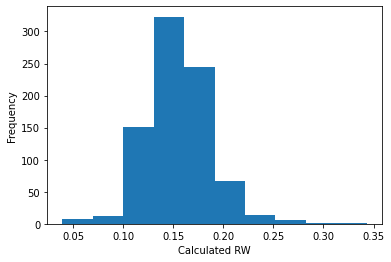

In [57]:
import matplotlib.pyplot as plt

plt.hist(KujungFM['rw'])
plt.xlabel('Calculated RW')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'SW')

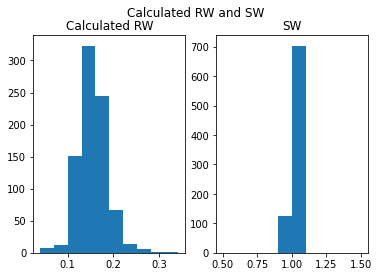

In [60]:
#1 row, 2 column - method 2
fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle("Calculated RW and SW")
ax1.hist(KujungFM['rw'])
ax1.set_title("Calculated RW")

ax2.hist(KujungFM['SW'], range=[0.5,1.5])
ax2.set_title("SW")

Text(0.5, 1.0, 'SW')

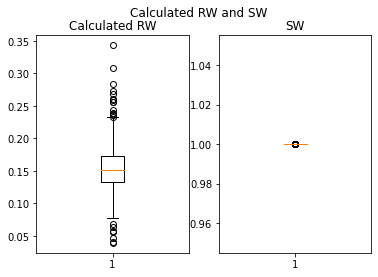

In [62]:
#1 row, 2 column - method 2
fig, (ax1, ax2) = plt.subplots(1,2)

fig.suptitle("Calculated RW and SW")
ax1.boxplot(KujungFM['rw'])
ax1.set_title("Calculated RW")

ax2.boxplot(KujungFM['SW'])
ax2.set_title("SW")